<a href="https://colab.research.google.com/github/SarahWohlford/SW_Projects-in-Machine-Learning-and-AI_P/blob/main/SW_Ai_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

path = kagglehub.dataset_download("ziya07/dance-music-data")

print("Path to dataset files:", path)

100%|██████████| 60.6k/60.6k [00:00<00:00, 34.7MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/ziya07/dance-music-data/versions/1


In [2]:
import os

# List files in the downloaded directory to find the correct CSV file name
downloaded_files = os.listdir(path)
print("Files in the downloaded directory:", downloaded_files)

Files in the downloaded directory: ['dance_music_dataset.csv']


In [4]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Path to CSV file (adjust if needed based on extracted files)
csv_path = os.path.join(path, "dance_music_dataset.csv")  # Corrected filename
df = pd.read_csv(csv_path)

# Show basic info
print("\n Dataset Info:")
print(df.info())

# Show sample data
print("\n Sample Rows:")
print(df.head())

# Check for missing values
print("\n Missing Values:")
print(df.isnull().sum())


df = df.dropna()


print("\n Summary Stats:")
print(df.describe())

# Check unique dance styles
print("\n Unique Dance Styles:")
print(df["dance_style"].unique())



# Encode dance_style
label_encoder = LabelEncoder()
df["dance_style_encoded"] = label_encoder.fit_transform(df["dance_style"])


print("\n Dance Style Encoding:")
for cls, idx in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{cls}: {idx}")


mfcc_cols = [f'mfcc_{i}' for i in range(13)] # Corrected to include only available MFCCs up to mfcc_12
feature_cols = mfcc_cols + [col for col in df.columns if 'chroma_' in col or 'spectral_contrast_' in col] + ['tempo']
X = df[feature_cols].values
y = df["dance_style_encoded"].values

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y) # Added stratify

# Train decision tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluate
print("\n Decision Tree Classification Report (with corrected features):")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

print("\n Confusion Matrix (Decision Tree):")
print(confusion_matrix(y_test, y_pred))


from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, max_depth=15, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\n Random Forest Classification Report (with corrected features):")
print(classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_))


 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tempo                200 non-null    float64
 1   dance_style          200 non-null    object 
 2   mfcc_0               200 non-null    float64
 3   mfcc_1               200 non-null    float64
 4   mfcc_2               200 non-null    float64
 5   mfcc_3               200 non-null    float64
 6   mfcc_4               200 non-null    float64
 7   mfcc_5               200 non-null    float64
 8   mfcc_6               200 non-null    float64
 9   mfcc_7               200 non-null    float64
 10  mfcc_8               200 non-null    float64
 11  mfcc_9               200 non-null    float64
 12  mfcc_10              200 non-null    float64
 13  mfcc_11              200 non-null    float64
 14  mfcc_12              200 non-null    float64
 15  chroma_0             200

In [5]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

# Evaluate
from sklearn.metrics import classification_report, confusion_matrix
print("\n Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_))

print("\n Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))



 Random Forest Classification Report:
              precision    recall  f1-score   support

      Ballet       0.50      0.12      0.20         8
     Hip-Hop       0.33      0.44      0.38         9
       Salsa       0.25      0.27      0.26        11
       Tango       0.21      0.25      0.23        12

    accuracy                           0.28        40
   macro avg       0.32      0.27      0.27        40
weighted avg       0.31      0.28      0.27        40


 Confusion Matrix:
[[1 3 3 1]
 [1 4 1 3]
 [0 1 3 7]
 [0 4 5 3]]


In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "SVM (Linear)": SVC(kernel="linear"),
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"\n {name} Accuracy: {acc:.2f}")
    print(classification_report(y_test, preds, target_names=label_encoder.classes_))



 Logistic Regression Accuracy: 0.20
              precision    recall  f1-score   support

      Ballet       0.29      0.25      0.27         8
     Hip-Hop       0.08      0.12      0.10         8
       Salsa       0.36      0.33      0.35        12
       Tango       0.11      0.08      0.10        12

    accuracy                           0.20        40
   macro avg       0.21      0.20      0.20        40
weighted avg       0.21      0.20      0.21        40


 Random Forest Accuracy: 0.30
              precision    recall  f1-score   support

      Ballet       0.50      0.25      0.33         8
     Hip-Hop       0.25      0.12      0.17         8
       Salsa       0.29      0.17      0.21        12
       Tango       0.28      0.58      0.38        12

    accuracy                           0.30        40
   macro avg       0.33      0.28      0.27        40
weighted avg       0.32      0.30      0.28        40


 SVM (Linear) Accuracy: 0.20
              precision    recal

In [ ]:
# Example: only classify Ballet vs non-Ballet
df_binary = df.copy()
df_binary["is_ballet"] = (df_binary["dance_style"] == "Ballet").astype(int)

X_bin = df_binary[feature_cols].values
y_bin = df_binary["is_ballet"].values


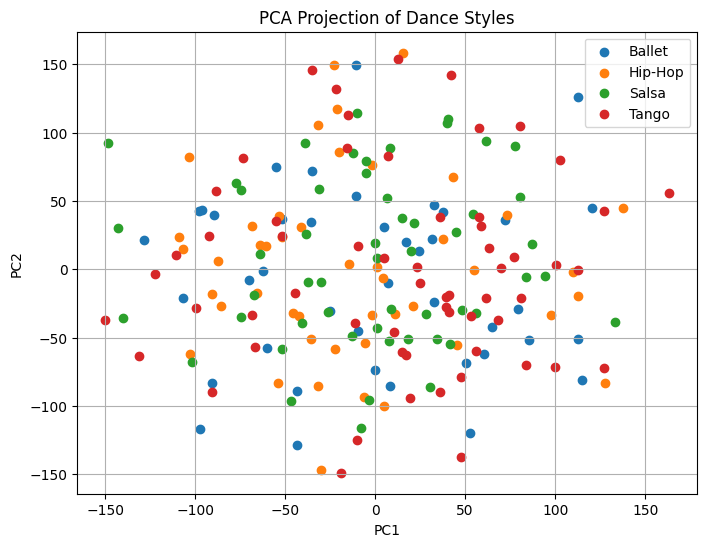

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
for label in np.unique(y):
    idx = y == label
    plt.scatter(X_pca[idx, 0], X_pca[idx, 1], label=label_encoder.inverse_transform([label])[0])
plt.legend()
plt.title("PCA Projection of Dance Styles")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()


In [ ]:
minimal_features = ['tempo'] + [f'mfcc_{i}' for i in range(13)]


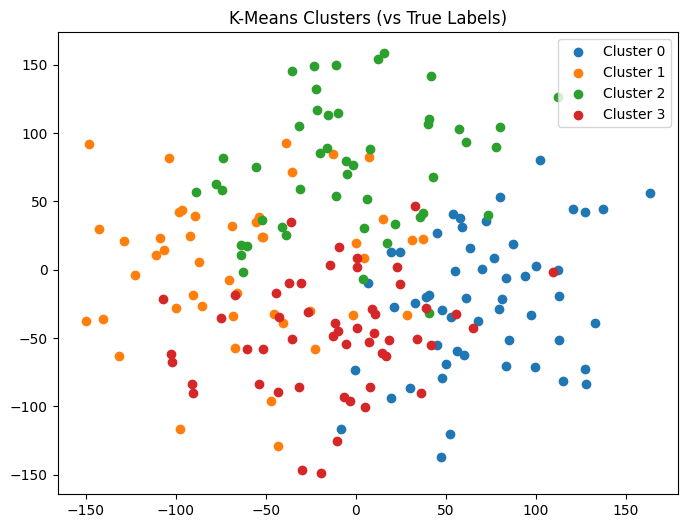

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


X_pca = pca.fit_transform(X)


kmeans = KMeans(n_clusters=4, random_state=42, n_init=10) # Added n_init for KMeans
clusters = kmeans.fit_predict(X)

# Plot clusters with true labels for comparison
plt.figure(figsize=(8,6))
for cluster in np.unique(clusters):

    plt.scatter(X_pca[clusters == cluster, 0], X_pca[clusters == cluster, 1], label=f"Cluster {cluster}")
plt.legend()
plt.title("K-Means Clusters (vs True Labels)")
plt.show()

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=200, max_depth=15, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print(" Random Forest Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

 Random Forest Classification Report:
              precision    recall  f1-score   support

      Ballet       0.33      0.12      0.18         8
     Hip-Hop       0.10      0.11      0.11         9
       Salsa       0.15      0.18      0.17        11
       Tango       0.21      0.25      0.23        12

    accuracy                           0.17        40
   macro avg       0.20      0.17      0.17        40
weighted avg       0.20      0.17      0.18        40



In [9]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=200, max_depth=10, learning_rate=0.1, use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print(" XGBoost Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [03:25:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


 XGBoost Classification Report:
              precision    recall  f1-score   support

      Ballet       0.00      0.00      0.00         8
     Hip-Hop       0.27      0.33      0.30         9
       Salsa       0.18      0.18      0.18        11
       Tango       0.23      0.25      0.24        12

    accuracy                           0.20        40
   macro avg       0.17      0.19      0.18        40
weighted avg       0.18      0.20      0.19        40



In [10]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

print(" MLP Neural Network Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

 MLP Neural Network Classification Report:
              precision    recall  f1-score   support

      Ballet       0.00      0.00      0.00         8
     Hip-Hop       0.25      0.22      0.24         9
       Salsa       0.29      0.45      0.36        11
       Tango       0.20      0.17      0.18        12

    accuracy                           0.23        40
   macro avg       0.19      0.21      0.19        40
weighted avg       0.20      0.23      0.21        40



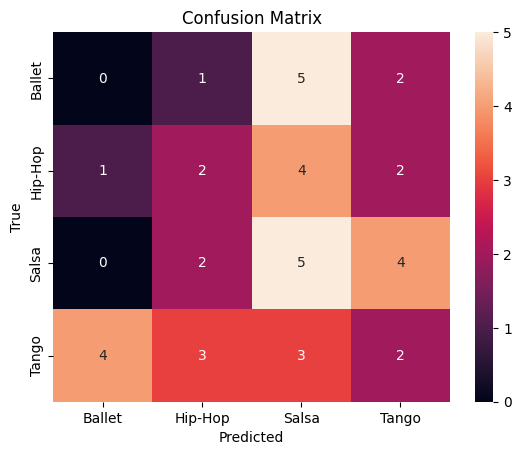

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA

feature_cols = [col for col in df.columns if col not in ['song_name', 'artist', 'dance_style']]
X = df[feature_cols].values


pca = PCA(n_components=10)
X_reduced = pca.fit_transform(X)


style_vectors = {}
for style in df['dance_style'].unique():
    style_mask = df['dance_style'] == style
    style_vectors[style] = X_reduced[style_mask].mean(axis=0)


def recommend_songs(target_style, top_n=5):
    if target_style not in style_vectors:
        print("Style not found.")
        return []

    target_vec = style_vectors[target_style].reshape(1, -1)
    sims = cosine_similarity(target_vec, X_reduced)[0]

    df['similarity'] = sims
    recs = df.sort_values(by='similarity', ascending=False)
    recs = recs[recs['dance_style'] != target_style]  # fixed filter

    return recs.head(top_n)[['tempo', 'dance_style', 'similarity']]

# Example usage
recommendations = recommend_songs("Hip-Hop", top_n=5)
print(recommendations)



          tempo dance_style  similarity
145  182.779700      Ballet    0.729260
185  142.552195      Ballet    0.686417
188  160.783481       Salsa    0.659851
60   108.354535      Ballet    0.614276
55   110.271073      Ballet    0.612228


'\n# Function to recommend songs given a style\ndef recommend_songs(target_style, top_n=5):\n    if target_style not in style_vectors:\n        print("Style not found.")\n        return []\n\n    target_vec = style_vectors[target_style].reshape(1, -1)\n    sims = cosine_similarity(target_vec, X_reduced)[0]\n\n    df[\'similarity\'] = sims\n    # Corrected column name to \'dance_style\'\n    recs = df.sort_values(by=\'similarity\', ascending=False)\n    recs = recs[df[\'dance_style\'] != target_style]\n\n    return recs.head(top_n)[[\'tempo\', \'dance_style\', \'similarity\']] # Included tempo and dance_style for better context\n\n# Example usage\nrecommendations = recommend_songs("Hip-Hop", top_n=5) # Corrected style name to "Hip-Hop" as per unique values\nprint(recommendations)\n'

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

use_autoencoder = True
encoding_dim = 10

feature_cols = [col for col in df.columns if col not in ['song_name', 'artist', 'dance_style']]
X = df[feature_cols].values

if use_autoencoder:
    input_dim = X.shape[1]
    input_layer = Input(shape=(input_dim,))
    encoded = Dense(encoding_dim, activation='relu')(input_layer)
    decoded = Dense(input_dim, activation='linear')(encoded)

    autoencoder = Model(input_layer, decoded)
    encoder = Model(input_layer, encoded)

    autoencoder.compile(optimizer=Adam(learning_rate=0.01), loss='mse')
    autoencoder.fit(X, X, epochs=50, batch_size=16, verbose=0)

    X_reduced = encoder.predict(X)
else:
    pca = PCA(n_components=encoding_dim)
    X_reduced = pca.fit_transform(X)

style_vectors = {}
for style in df['dance_style'].unique():
    style_mask = df['dance_style'] == style
    style_vectors[style] = X_reduced[style_mask].mean(axis=0)

def recommend_songs(target_style, top_n=5):
    if target_style not in style_vectors:
        print("Style not found.")
        return []

    target_vec = style_vectors[target_style].reshape(1, -1)
    sims = cosine_similarity(target_vec, X_reduced)[0]

    df['similarity'] = sims
    recs = df.sort_values(by='similarity', ascending=False)
    recs = recs[recs['dance_style'] != target_style]  # fixed filter

    return recs.head(top_n)[['tempo', 'dance_style', 'similarity']]

recommendations = recommend_songs("Hip-Hop", top_n=5)
print(recommendations)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
          tempo dance_style  similarity
186  188.656639      Ballet    0.978191
96   171.751850       Salsa    0.977291
125  195.143434      Ballet    0.977246
98   111.685700      Ballet    0.973705
170  175.773443       Tango    0.973551


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA

# Exclude non-feature columns
feature_cols = [col for col in df.columns if col not in ['song_name', 'artist', 'dance_style', 'dance_style_encoded', 'is_ballet', 'similarity']]
X = df[feature_cols].values


pca = PCA(n_components=10)
X_reduced = pca.fit_transform(X)


style_vectors = {}
for style in df['dance_style'].unique():
    style_mask = df['dance_style'] == style
    style_vectors[style] = X_reduced[style_mask].mean(axis=0)

# Function to recommend songs given a style
def recommend_songs_content_based(target_style, top_n=5):
    if target_style not in style_vectors:
        print(f"Style '{target_style}' not found.")
        return pd.DataFrame()

    target_vec = style_vectors[target_style].reshape(1, -1)
    # Calculate cosine similarity between the target style vector and all song vectors
    sims = cosine_similarity(target_vec, X_reduced)[0]
    temp_df = df.copy()
    temp_df['similarity'] = sims

    # Sort by similarity and exclude the target style's own songs from recommendations
    recs = temp_df.sort_values(by='similarity', ascending=False)
    recs = recs[recs['dance_style'] != target_style]

    # Return the top N recommendations with relevant columns
    return recs.head(top_n)[['tempo', 'dance_style', 'similarity'] + feature_cols]


recommended_songs_salsa = recommend_songs_content_based("Salsa", top_n=5)
print("\nRecommendations for Salsa:")
display(recommended_songs_salsa)


recommended_songs_ballet = recommend_songs_content_based("Ballet", top_n=5)
print("\nRecommendations for Ballet:")
display(recommended_songs_ballet)


Recommendations for Salsa:


,tempo,dance_style,similarity,tempo,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,...,chroma_9,chroma_10,chroma_11,spectral_contrast_0,spectral_contrast_1,spectral_contrast_2,spectral_contrast_3,spectral_contrast_4,spectral_contrast_5,spectral_contrast_6
1,179.155512,Ballet,0.601909,179.155512,19.076703,37.498261,92.500360,-55.348466,-78.563401,78.139378,...,0.116654,0.282864,0.013860,3.547777,7.651989,1.015575,1.936251,3.467284,2.770293,3.333807
163,98.910392,Tango,0.496379,98.910392,62.071175,-88.654795,66.702611,-31.088087,39.599865,-51.535822,...,0.788700,0.356053,0.202593,6.945007,9.376949,0.813588,5.900609,3.994852,6.274868,6.287162
199,131.906548,Ballet,0.488875,131.906548,0.726933,-43.480369,28.542439,-87.372132,-41.710800,45.701403,...,0.579435,0.143978,0.381372,0.759595,4.416395,8.161698,0.114967,0.181527,4.901323,6.358907
123,71.793139,Ballet,0.487428,71.793139,69.570978,-27.968808,94.534328,-57.101558,-25.086366,50.753518,...,0.837683,0.702760,0.038141,5.165515,6.095604,1.770643,6.657090,0.157386,3.295859,7.907306
121,199.298847,Hip-Hop,0.429512,199.298847,88.150267,34.173298,77.784852,-18.759735,-86.047926,5.163390,...,0.954919,0.070589,0.147725,4.582105,8.756545,5.731314,0.569653,6.859211,7.513978,6.219747



Recommendations for Ballet:


,tempo,dance_style,similarity,tempo,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,...,chroma_9,chroma_10,chroma_11,spectral_contrast_0,spectral_contrast_1,spectral_contrast_2,spectral_contrast_3,spectral_contrast_4,spectral_contrast_5,spectral_contrast_6
136,76.372559,Salsa,0.706834,76.372559,-95.858390,94.644207,-83.836041,6.178412,-4.473741,-76.306712,...,0.649665,0.891945,0.517516,9.839115,9.724675,3.704273,5.875179,5.652638,2.982835,2.703604
151,132.984637,Hip-Hop,0.584973,132.984637,-7.224476,52.961974,-49.709223,73.454073,93.581445,94.183630,...,0.410674,0.271732,0.868512,5.081286,3.842207,9.901689,1.344859,4.663270,9.256691,6.238026
87,62.268253,Salsa,0.584371,62.268253,-54.158802,64.724764,-14.130630,-44.620871,-28.620300,66.929766,...,0.911224,0.827035,0.193508,3.786106,2.188323,7.902742,2.097559,3.080630,8.313599,6.842367
25,166.216520,Tango,0.570451,166.216520,-89.089081,-22.679143,38.994218,5.462255,54.788850,-13.618285,...,0.893947,0.509851,0.166061,2.743113,9.279022,1.717049,4.597999,8.637686,6.271351,9.555751
194,150.977271,Tango,0.552062,150.977271,29.025548,96.072604,-73.525196,4.791179,-36.689655,35.123842,...,0.649926,0.386865,0.699468,8.702756,5.693165,1.064932,3.458454,1.457684,0.590537,1.877061


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA



# Calculate similarity of each song to the average vector of each style
similarity_scores = {}
for style, avg_vec in style_vectors.items():
    sims = cosine_similarity(avg_vec.reshape(1, -1), X_reduced)[0]
    similarity_scores[style] = sims

similarity_df = pd.DataFrame(similarity_scores)
similarity_df['true_style'] = df['dance_style']

# Analyze if the highest similarity score for each song corresponds to its true style
correct_predictions = 0
total_songs = len(similarity_df)

print("\nAnalyzing Similarity to True Style:")
for index, row in similarity_df.iterrows():
    true_style = row['true_style']

    predicted_style = similarity_df.columns[np.argmax(row[:-1].values)]


    if true_style == predicted_style:
        correct_predictions += 1

accuracy_based_on_similarity = correct_predictions / total_songs
print(f"\nAccuracy based on highest similarity to style vectors: {accuracy_based_on_similarity:.2f}")

print("\nSample Similarity Matrix (first 5 songs):")
display(similarity_df.head())


Analyzing Similarity to True Style:

Accuracy based on highest similarity to style vectors: 0.39

Sample Similarity Matrix (first 5 songs):


,Salsa,Ballet,Tango,Hip-Hop,true_style
0,0.524735,-0.204336,-0.013583,-0.451233,Salsa
1,0.601909,-0.345171,-0.406097,0.181332,Ballet
2,-0.246330,-0.276238,0.348357,-0.086669,Tango
3,0.058981,0.005664,-0.124802,0.127405,Tango
4,-0.557149,-0.352645,0.341639,0.336195,Hip-Hop


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import numpy as np

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=3, # Using 3-fold cross-validation
                           n_jobs=-1, # Use all available cores
                           verbose=2, # Increase verbosity for output
                           scoring='accuracy') # Score based on accuracy

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)


print("\nBest hyperparameters found:")
print(grid_search.best_params_)

# Get the best model
best_rf_model = grid_search.best_estimator_


y_pred_best_rf = best_rf_model.predict(X_test)

print("\n Tuned Random Forest Classification Report:")
print(classification_report(y_test, y_pred_best_rf, target_names=label_encoder.classes_))

print(f"\nBest cross-validation accuracy: {grid_search.best_score_:.2f}")

Fitting 3 folds for each of 108 candidates, totalling 324 fits

Best hyperparameters found:
{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}

 Tuned Random Forest Classification Report:
              precision    recall  f1-score   support

      Ballet       0.33      0.12      0.18         8
     Hip-Hop       0.27      0.33      0.30         9
       Salsa       0.38      0.27      0.32        11
       Tango       0.22      0.33      0.27        12

    accuracy                           0.28        40
   macro avg       0.30      0.27      0.27        40
weighted avg       0.30      0.28      0.27        40


Best cross-validation accuracy: 0.34


In [1]:

ballet_tempo_ranges = {
    "Plié": (40, 60),  # Slow and sustained
    "Tendu": (60, 80), # Moderate tempo
    "Battement Glissé/Jeté": (80, 120), # Faster, more energetic
    "Rond de Jambe par Terre": (50, 70), # Moderate and flowing
    "Battement Frappé": (120, 160), # Sharp and fast
    "Adagio": (40, 55), # Very slow and sustained
    "Allegro": (120, 180), # Fast and lively (for jumps and quick steps)
}

# Print the defined tempo ranges
print("Typical Tempo Ranges for Ballet Exercises (BPM):")
for exercise, tempo_range in ballet_tempo_ranges.items():
    print(f"{exercise}: {tempo_range[0]} - {tempo_range[1]} BPM")

Typical Tempo Ranges for Ballet Exercises (BPM):
Plié: 40 - 60 BPM
Tendu: 60 - 80 BPM
Battement Glissé/Jeté: 80 - 120 BPM
Rond de Jambe par Terre: 50 - 70 BPM
Battement Frappé: 120 - 160 BPM
Adagio: 40 - 55 BPM
Allegro: 120 - 180 BPM


In [2]:

relevant_features = ['tempo'] + [f'mfcc_{i}' for i in range(13)] + \
                    [f'chroma_{i}' for i in range(12)] + \
                    [f'spectral_contrast_{i}' for i in range(7)]

print("Selected relevant features for characterizing ballet exercises:")
print(relevant_features)

Selected relevant features for characterizing ballet exercises:
['tempo', 'mfcc_0', 'mfcc_1', 'mfcc_2', 'mfcc_3', 'mfcc_4', 'mfcc_5', 'mfcc_6', 'mfcc_7', 'mfcc_8', 'mfcc_9', 'mfcc_10', 'mfcc_11', 'mfcc_12', 'chroma_0', 'chroma_1', 'chroma_2', 'chroma_3', 'chroma_4', 'chroma_5', 'chroma_6', 'chroma_7', 'chroma_8', 'chroma_9', 'chroma_10', 'chroma_11', 'spectral_contrast_0', 'spectral_contrast_1', 'spectral_contrast_2', 'spectral_contrast_3', 'spectral_contrast_4', 'spectral_contrast_5', 'spectral_contrast_6']


In [6]:
import kagglehub
import os
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Download latest version
path = kagglehub.dataset_download("ziya07/dance-music-data")

print("Path to dataset files:", path)

# Load the dataframe using the dynamically obtained path
csv_path = os.path.join(path, "dance_music_dataset.csv")
df = pd.read_csv(csv_path)


df_ballet = df[df['dance_style'] == 'Ballet'].copy()

# Create feature matrix for ballet songs using relevant features
# Ensure relevant_features are present in df_ballet
ballet_relevant_features = [f for f in relevant_features if f in df_ballet.columns]
X_ballet = df_ballet[ballet_relevant_features].values



exercise_feature_vectors = {}

for exercise, (min_tempo, max_tempo) in ballet_tempo_ranges.items():
    # Filter songs within the tempo range for the current exercise
    exercise_songs = df_ballet[(df_ballet['tempo'] >= min_tempo) & (df_ballet['tempo'] <= max_tempo)]

    if not exercise_songs.empty:
        # Extract relevant features for these songs
        exercise_features = exercise_songs[ballet_relevant_features].values

        # Calculate the mean feature vector
        avg_feature_vector = exercise_features.mean(axis=0)
        exercise_feature_vectors[exercise] = avg_feature_vector
    else:
        print(f"No songs found for {exercise} within the tempo range {min_tempo}-{max_tempo} BPM.")
        exercise_feature_vectors[exercise] = np.zeros(len(ballet_relevant_features)) # Use zero vector if no songs found


print("\nCalculated average feature vectors for ballet exercises:")
for exercise, vec in exercise_feature_vectors.items():
    print(f"{exercise}: Average vector shape {vec.shape}")

def recommend_exercise(song_features, exercise_feature_vectors):
    """Recommends a ballet exercise based on song features."""
    similarities = {}
    for exercise, avg_vec in exercise_feature_vectors.items():

        if song_features.shape == avg_vec.shape:
            # Calculate cosine similarity
            similarity = cosine_similarity(song_features.reshape(1, -1), avg_vec.reshape(1, -1))[0][0]
            similarities[exercise] = similarity
        else:

            print(f"Dimension mismatch for exercise {exercise}: song_features shape {song_features.shape}, avg_vec shape {avg_vec.shape}")
            similarities[exercise] = -np.inf # Assign a very low similarity

    # Find the exercise with the highest similarity
    if similarities and max(similarities.values()) != -np.inf:
        recommended_exercise = max(similarities, key=similarities.get)
        return recommended_exercise
    else:
        return "No recommendation possible"

#  get recommendations
recommendations = []
for i in range(X_ballet.shape[0]):
    song_features = X_ballet[i, :]
    recommended = recommend_exercise(song_features, exercise_feature_vectors)
    recommendations.append(recommended)

#  Store the recommendations
df_ballet['recommended_exercise'] = recommendations

# Display
print("\nBallet songs with recommended exercises:")
display(df_ballet[['tempo', 'dance_style', 'recommended_exercise'] + ballet_relevant_features].head())

100%|██████████| 60.6k/60.6k [00:00<00:00, 2.23MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/ziya07/dance-music-data/versions/1
No songs found for Plié within the tempo range 40-60 BPM.
No songs found for Adagio within the tempo range 40-55 BPM.

Calculated average feature vectors for ballet exercises:
Plié: Average vector shape (33,)
Tendu: Average vector shape (33,)
Battement Glissé/Jeté: Average vector shape (33,)
Rond de Jambe par Terre: Average vector shape (33,)
Battement Frappé: Average vector shape (33,)
Adagio: Average vector shape (33,)
Allegro: Average vector shape (33,)

Ballet songs with recommended exercises:


,tempo,dance_style,recommended_exercise,tempo,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,...,chroma_9,chroma_10,chroma_11,spectral_contrast_0,spectral_contrast_1,spectral_contrast_2,spectral_contrast_3,spectral_contrast_4,spectral_contrast_5,spectral_contrast_6
1,179.155512,Ballet,Battement Glissé/Jeté,179.155512,19.076703,37.498261,92.500360,-55.348466,-78.563401,78.139378,...,0.116654,0.282864,0.013860,3.547777,7.651989,1.015575,1.936251,3.467284,2.770293,3.333807
17,152.382763,Ballet,Battement Frappé,152.382763,-35.384379,-20.730238,-83.132690,-86.222075,-33.142263,-47.772227,...,0.002661,0.706612,0.402744,7.469803,2.951989,0.292469,4.852047,4.690786,6.039735,8.040193
24,74.972568,Ballet,Tendu,74.972568,33.333913,-55.629142,80.569915,-16.862674,-65.415055,-48.086925,...,0.914026,0.754059,0.769581,6.105010,8.303101,0.491803,5.455918,5.673380,3.166283,9.183192
31,143.367127,Ballet,Battement Frappé,143.367127,47.793842,-19.248190,-24.115496,64.605852,15.635370,-5.371394,...,0.187443,0.684848,0.071169,7.154418,1.143231,4.819100,3.882893,3.932675,6.142548,3.353018
34,158.079426,Ballet,Battement Frappé,158.079426,-24.250262,-12.192143,-99.444102,-48.978308,-83.079089,-44.766308,...,0.806986,0.352251,0.229271,9.189608,7.831509,4.657302,8.447033,2.433865,0.639752,6.063090


## Identify the type of ai system

### Subtask:
Explain that this approach is a form of a content-based recommendation system, which falls under the umbrella of machine learning and artificial intelligence.


In [8]:
#Filter the DataFrame df to create a new DataFrame df_ballet containing only rows where the 'dance_style' column is 'Ballet'.
df_ballet = df[df['dance_style'] == 'Ballet'].copy()


recommendations = []
ballet_relevant_features = [f for f in relevant_features if f in df_ballet.columns] # Ensure features exist in the ballet subset
for index, row in df_ballet.iterrows():
    song_features = row[ballet_relevant_features].values
    # Ensure song_features is a numpy array with the correct shape for cosine_similarity
    song_features = np.array(song_features).astype(np.float64) # Convert to numpy array and correct dtype

    recommended = recommend_exercise(song_features, exercise_feature_vectors)
    recommendations.append(recommended)

# Store the recommended exercises in a new column
df_ballet['recommended_exercise'] = recommendations


display_cols = ['tempo', 'dance_style', 'recommended_exercise'] + ballet_relevant_features
display(df_ballet[display_cols].head())

,tempo,dance_style,recommended_exercise,tempo,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,...,chroma_9,chroma_10,chroma_11,spectral_contrast_0,spectral_contrast_1,spectral_contrast_2,spectral_contrast_3,spectral_contrast_4,spectral_contrast_5,spectral_contrast_6
1,179.155512,Ballet,Battement Glissé/Jeté,179.155512,19.076703,37.498261,92.500360,-55.348466,-78.563401,78.139378,...,0.116654,0.282864,0.013860,3.547777,7.651989,1.015575,1.936251,3.467284,2.770293,3.333807
17,152.382763,Ballet,Battement Frappé,152.382763,-35.384379,-20.730238,-83.132690,-86.222075,-33.142263,-47.772227,...,0.002661,0.706612,0.402744,7.469803,2.951989,0.292469,4.852047,4.690786,6.039735,8.040193
24,74.972568,Ballet,Tendu,74.972568,33.333913,-55.629142,80.569915,-16.862674,-65.415055,-48.086925,...,0.914026,0.754059,0.769581,6.105010,8.303101,0.491803,5.455918,5.673380,3.166283,9.183192
31,143.367127,Ballet,Battement Frappé,143.367127,47.793842,-19.248190,-24.115496,64.605852,15.635370,-5.371394,...,0.187443,0.684848,0.071169,7.154418,1.143231,4.819100,3.882893,3.932675,6.142548,3.353018
34,158.079426,Ballet,Battement Frappé,158.079426,-24.250262,-12.192143,-99.444102,-48.978308,-83.079089,-44.766308,...,0.806986,0.352251,0.229271,9.189608,7.831509,4.657302,8.447033,2.433865,0.639752,6.063090


In [9]:

print("\nExamining Ballet Song Recommendations:")
display(df_ballet[['tempo', 'dance_style', 'recommended_exercise']].head())


print("\nAnalysis of Recommended Exercises and Tempo:")
for exercise, (min_tempo, max_tempo) in ballet_tempo_ranges.items():
    exercise_recs = df_ballet[df_ballet['recommended_exercise'] == exercise]
    if not exercise_recs.empty:
        print(f"\nRecommended Exercise: {exercise} (Typical Tempo: {min_tempo}-{max_tempo} BPM)")
        # Analyze tempo distribution of songs recommended for this exercise
        print(f"  Number of recommendations: {len(exercise_recs)}")
        print(f"  Tempo range of recommended songs: {exercise_recs['tempo'].min():.2f} - {exercise_recs['tempo'].max():.2f} BPM")
        print(f"  Average tempo of recommended songs: {exercise_recs['tempo'].mean():.2f} BPM")
    else:
        print(f"\nNo songs were recommended for {exercise}.")



print("\nFrequency of Recommended Exercises:")
print(df_ballet['recommended_exercise'].value_counts())




Examining Ballet Song Recommendations:


,tempo,dance_style,recommended_exercise
1,179.155512,Ballet,Battement Glissé/Jeté
17,152.382763,Ballet,Battement Frappé
24,74.972568,Ballet,Tendu
31,143.367127,Ballet,Battement Frappé
34,158.079426,Ballet,Battement Frappé



Analysis of Recommended Exercises and Tempo:

No songs were recommended for Plié.

Recommended Exercise: Tendu (Typical Tempo: 60-80 BPM)
  Number of recommendations: 4
  Tempo range of recommended songs: 67.67 - 187.20 BPM
  Average tempo of recommended songs: 100.41 BPM

Recommended Exercise: Battement Glissé/Jeté (Typical Tempo: 80-120 BPM)
  Number of recommendations: 12
  Tempo range of recommended songs: 82.03 - 198.77 BPM
  Average tempo of recommended songs: 132.64 BPM

Recommended Exercise: Rond de Jambe par Terre (Typical Tempo: 50-70 BPM)
  Number of recommendations: 5
  Tempo range of recommended songs: 63.37 - 142.55 BPM
  Average tempo of recommended songs: 91.21 BPM

Recommended Exercise: Battement Frappé (Typical Tempo: 120-160 BPM)
  Number of recommendations: 10
  Tempo range of recommended songs: 68.08 - 171.54 BPM
  Average tempo of recommended songs: 140.91 BPM

No songs were recommended for Adagio.

Recommended Exercise: Allegro (Typical Tempo: 120-180 BPM)
  Num